In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('train.csv')
data.shape

(277, 32)

In [3]:
data.shape

(277, 32)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StudentId   277 non-null    int64 
 1   school      277 non-null    object
 2   sex         277 non-null    object
 3   age         277 non-null    int64 
 4   address     277 non-null    object
 5   famsize     277 non-null    object
 6   Pstatus     277 non-null    object
 7   Medu        277 non-null    int64 
 8   Fedu        277 non-null    int64 
 9   Mjob        277 non-null    object
 10  Fjob        277 non-null    object
 11  reason      277 non-null    object
 12  guardian    277 non-null    object
 13  traveltime  277 non-null    int64 
 14  studytime   277 non-null    int64 
 15  failures    277 non-null    int64 
 16  schoolsup   277 non-null    object
 17  famsup      277 non-null    object
 18  paid        277 non-null    object
 19  activities  277 non-null    object
 20  nursery   

In [5]:
data.dtypes.value_counts()

object    17
int64     15
dtype: int64

In [6]:
data.describe(include='O')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,277,277,277,277,277,277,277,277,277,277,277,277,277,277,277,277,277
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,M,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,250,141,219,199,251,103,154,102,191,241,168,149,139,220,262,232,184


In [7]:
data.isna()

,StudentId,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Grade
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
273,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
274,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
275,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isna().sum()

StudentId     0
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
Grade         0
dtype: int64

In [9]:
df = pd.DataFrame(data)
df.drop('StudentId', axis=1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Grade
0,GP,M,15,U,GT3,T,4,3,teacher,other,...,yes,no,4,4,1,1,1,1,0,15
1,GP,M,15,U,GT3,T,4,4,health,health,...,yes,no,5,4,2,1,1,5,0,15
2,GP,M,16,U,LE3,T,4,2,teacher,other,...,yes,no,4,5,1,1,3,5,2,16
3,GP,M,16,U,LE3,T,2,2,other,other,...,yes,no,5,4,4,2,4,5,0,12
4,GP,F,15,R,GT3,T,2,4,services,health,...,yes,no,4,3,2,1,1,5,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,7
273,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,10
274,MS,M,19,U,LE3,T,1,1,other,at_home,...,yes,no,3,2,3,3,3,5,5,9
275,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,6


In [10]:
df = df.iloc[: , 1:]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      277 non-null    object
 1   sex         277 non-null    object
 2   age         277 non-null    int64 
 3   address     277 non-null    object
 4   famsize     277 non-null    object
 5   Pstatus     277 non-null    object
 6   Medu        277 non-null    int64 
 7   Fedu        277 non-null    int64 
 8   Mjob        277 non-null    object
 9   Fjob        277 non-null    object
 10  reason      277 non-null    object
 11  guardian    277 non-null    object
 12  traveltime  277 non-null    int64 
 13  studytime   277 non-null    int64 
 14  failures    277 non-null    int64 
 15  schoolsup   277 non-null    object
 16  famsup      277 non-null    object
 17  paid        277 non-null    object
 18  activities  277 non-null    object
 19  nursery     277 non-null    object
 20  higher    

In [12]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'Grade'],
      dtype='object')

In [13]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,Grade
count,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000
mean,16.787004,2.754513,2.487365,1.429603,2.050542,0.379061,3.931408,3.281588,3.108303,1.494585,2.285199,3.566787,6.234657,10.296029
std,1.305553,1.078960,1.082144,0.664518,0.849749,0.773657,0.928019,0.992793,1.130523,0.903379,1.302825,1.364687,8.886512,4.661640
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,20.000000


In [14]:
corr = df.corr()

<AxesSubplot:>

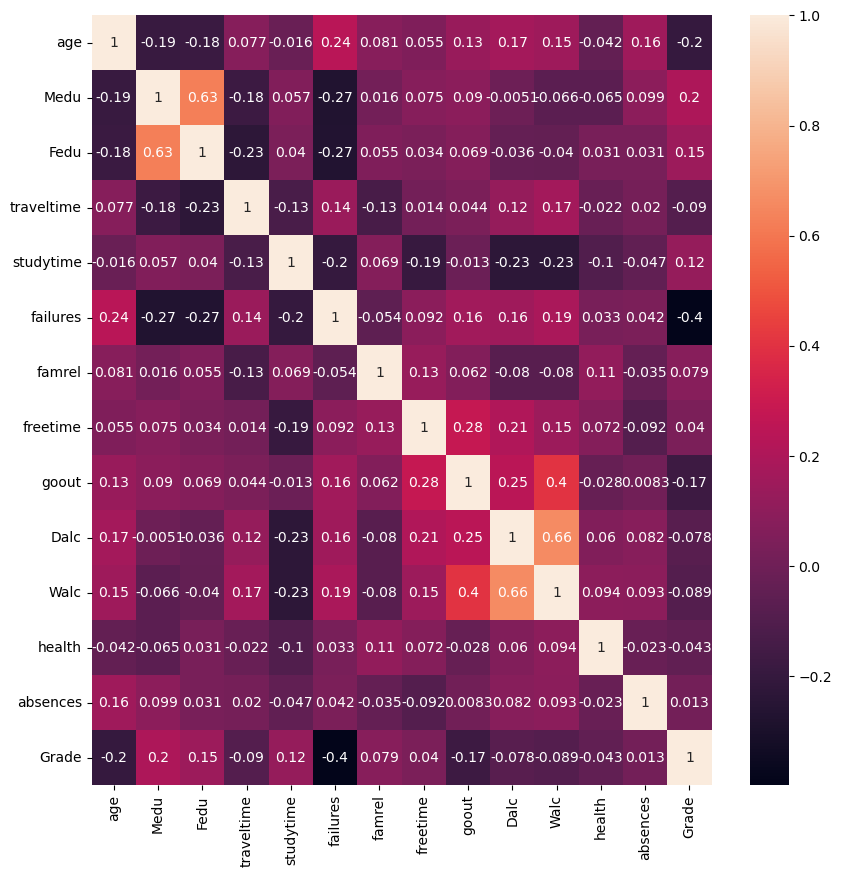

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(data=corr,annot=True)

<AxesSubplot:>

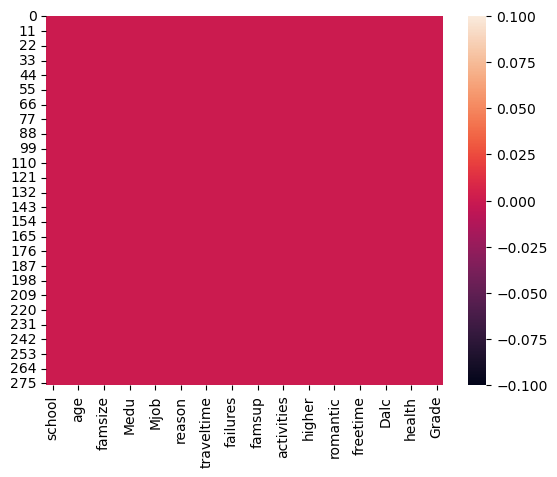

In [16]:
sns.heatmap(df.isnull()) #no missing values

<AxesSubplot:xlabel='sex', ylabel='count'>

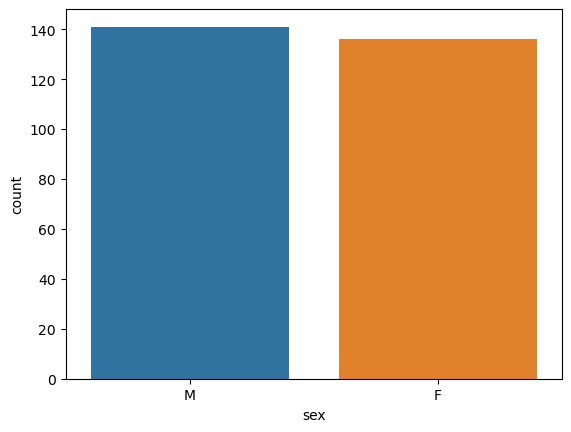

In [17]:
sns.countplot(x='sex', data=df)

In [18]:
#female count
female = len(df[df['sex']=='F'])
female

136

In [19]:
#male count
male = len(df[df['sex']=='M'])
male

141

In [20]:
categorical_values = []
numerical_values = []
for i,c in enumerate(df.dtypes):
    if c=='object':
        categorical_values.append(df.iloc[:,i])
    else:
        numerical_values.append(df.iloc[:,i])
        

In [21]:
categorical_values = pd.DataFrame(categorical_values).T
categorical_values

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,M,U,GT3,T,teacher,other,reputation,mother,no,no,no,no,yes,yes,yes,no
1,GP,M,U,GT3,T,health,health,other,father,no,yes,yes,no,yes,yes,yes,no
2,GP,M,U,LE3,T,teacher,other,course,mother,no,no,no,yes,yes,yes,yes,no
3,GP,M,U,LE3,T,other,other,reputation,mother,no,yes,no,yes,yes,yes,yes,no
4,GP,F,R,GT3,T,services,health,course,mother,yes,yes,yes,yes,yes,yes,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,MS,M,R,GT3,T,other,other,course,other,no,no,no,no,no,yes,no,no
273,MS,M,R,LE3,T,services,other,course,mother,no,no,no,no,no,yes,yes,no
274,MS,M,U,LE3,T,other,at_home,course,father,no,no,no,no,yes,yes,yes,no
275,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no


In [22]:
numerical_values = pd.DataFrame(numerical_values).T
numerical_values

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,Grade
0,15,4,3,1,2,0,4,4,1,1,1,1,0,15
1,15,4,4,1,1,0,5,4,2,1,1,5,0,15
2,16,4,2,1,2,0,4,5,1,1,3,5,2,16
3,16,2,2,2,2,0,5,4,4,2,4,5,0,12
4,15,2,4,1,3,0,4,3,2,1,1,5,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,21,1,1,1,1,3,5,5,3,3,3,3,3,7
273,18,3,2,3,1,0,4,4,1,3,4,5,0,10
274,19,1,1,1,1,0,3,2,3,3,3,5,5,9
275,18,4,4,2,2,0,4,3,4,1,1,3,6,6


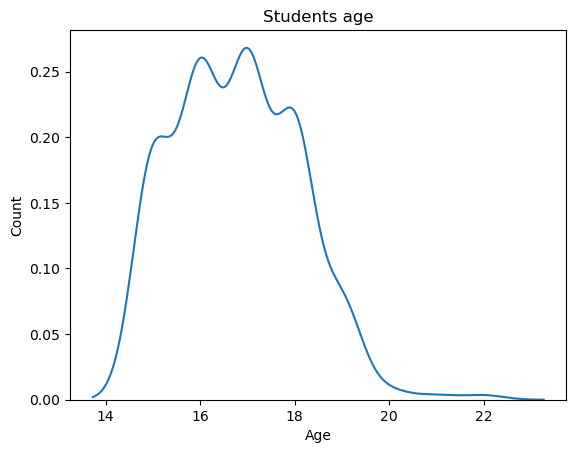

In [23]:
age = sns.kdeplot(df['age'])    
age.axes.set_title('Students age')
age.set_xlabel('Age')
age.set_ylabel('Count')
plt.show()

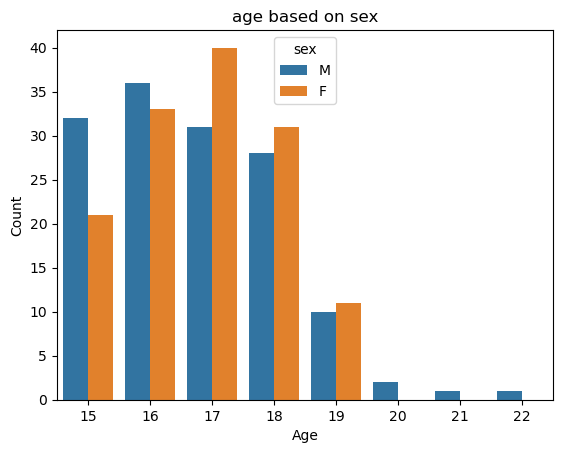

In [24]:
age_sex = sns.countplot(x='age', hue='sex', data=df)
age_sex.axes.set_title('age based on sex')
age_sex.set_xlabel('Age')
age_sex.set_ylabel('Count')
plt.show()

<AxesSubplot:>

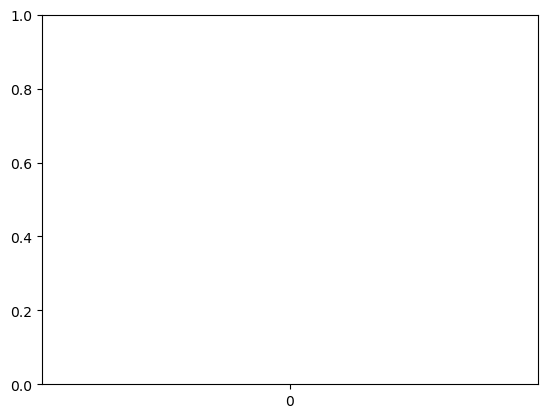

In [25]:
sns.boxplot(df=categorical_values)

In [26]:
target = df['Grade']

In [27]:
print(target)

0      15
1      15
2      16
3      12
4       8
       ..
272     7
273    10
274     9
275     6
276     0
Name: Grade, Length: 277, dtype: int64


Text(0.5, 1.0, 'Grade based on age intervall')

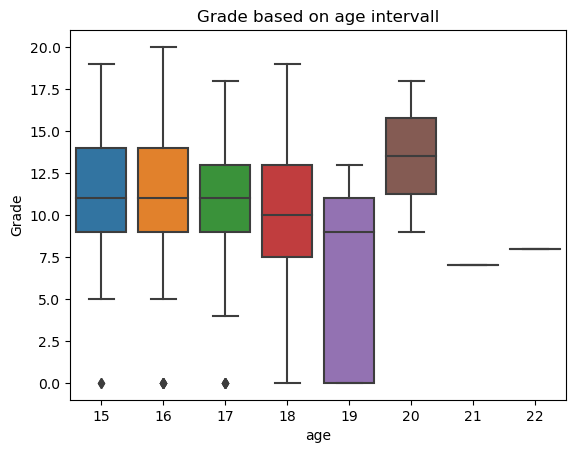

In [28]:
target_age= sns.boxplot(x='age', y='Grade',data=df)
target_age.axes.set_title('Grade based on age intervall')

Text(0.5, 1.0, 'Grade based on sex ')

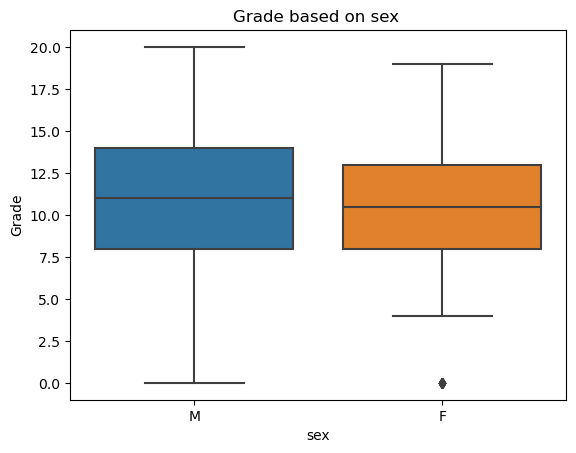

In [29]:
target_sex= sns.boxplot(x='sex', y='Grade',data=df)
target_sex.axes.set_title('Grade based on sex ')

Text(0.5, 1.0, 'Grade based on family supplies')

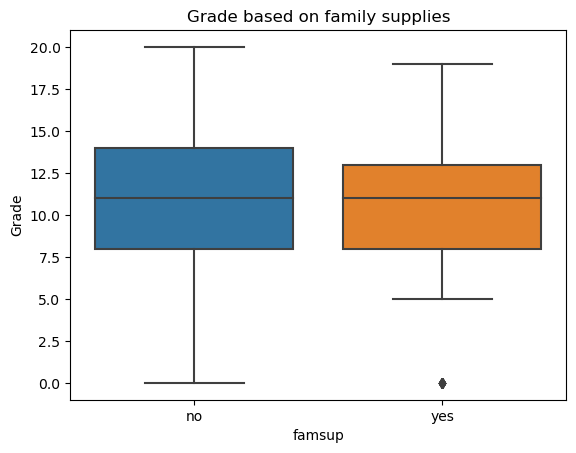

In [30]:
target_famsup= sns.boxplot(x='famsup', y='Grade',data=df)
target_famsup.axes.set_title('Grade based on family supplies')

Text(0.5, 1.0, 'Grade based on extra paid classes')

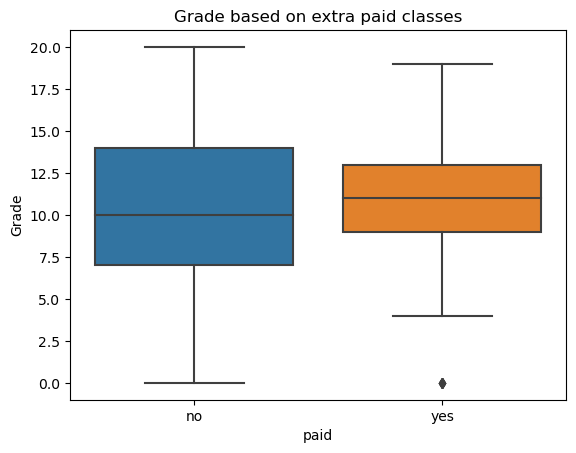

In [31]:
target_paid= sns.boxplot(x='paid', y='Grade',data=df)
target_paid.axes.set_title('Grade based on extra paid classes')

Text(0.5, 1.0, 'Grade based on activities')

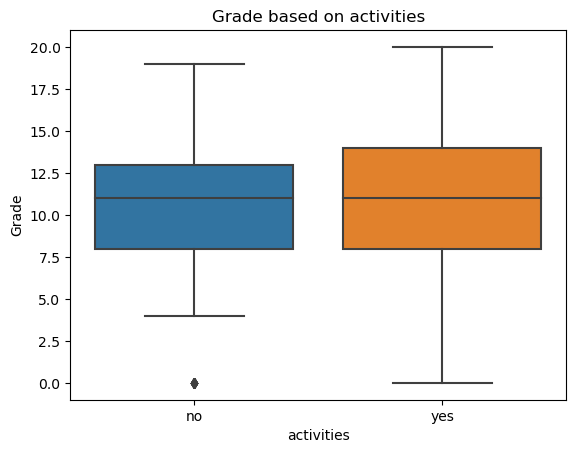

In [32]:
target_act= sns.boxplot(x='activities', y='Grade',data=df)
target_act.axes.set_title('Grade based on activities')

Text(0.5, 1.0, 'Grade based on attended nursery')

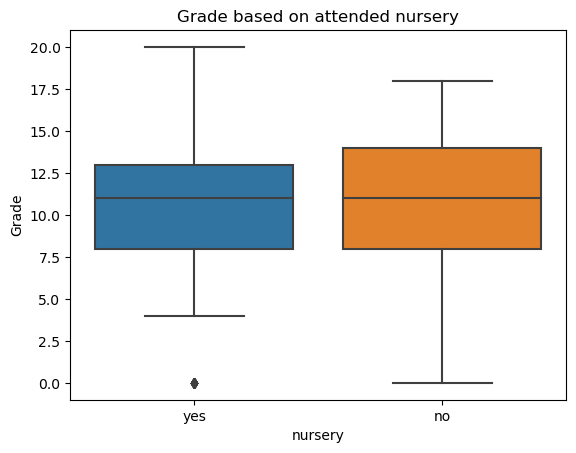

In [33]:
target_nurs= sns.boxplot(x='nursery', y='Grade',data=df)
target_nurs.axes.set_title('Grade based on attended nursery')

Text(0.5, 1.0, 'Grade based on wanting higher education')

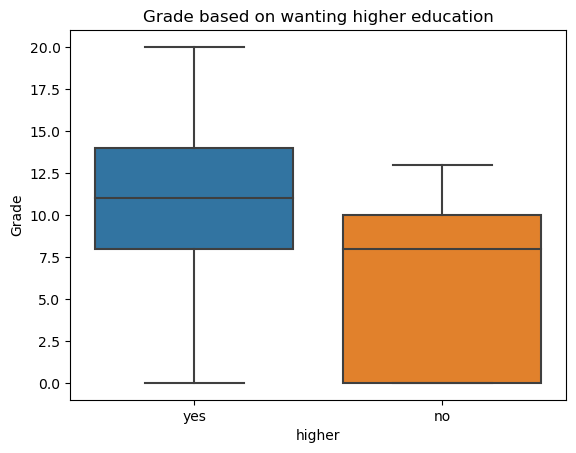

In [34]:
target_higher= sns.boxplot(x='higher', y='Grade',data=df)
target_higher.axes.set_title('Grade based on wanting higher education')

Text(0.5, 1.0, 'Grade based on internet access')

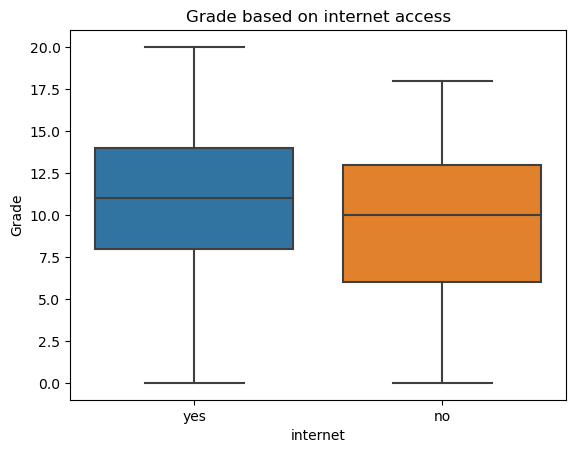

In [35]:
target_int= sns.boxplot(x='internet', y='Grade',data=df)
target_int.axes.set_title('Grade based on internet access')

Text(0.5, 1.0, 'Grade based on romantic relationship')

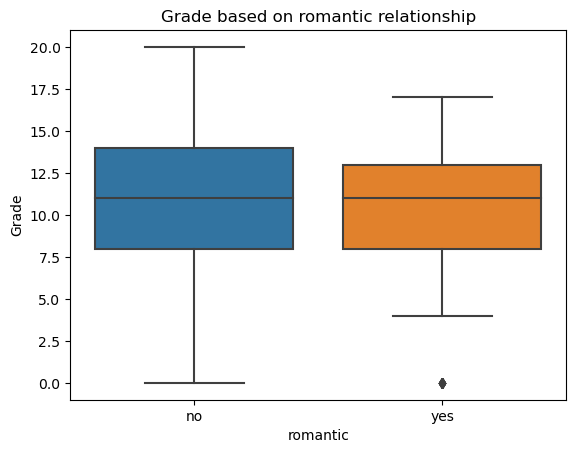

In [36]:
target_rom= sns.boxplot(x='romantic', y='Grade',data=df)
target_rom.axes.set_title('Grade based on romantic relationship')

Text(0.5, 1.0, 'Grade based on quality family relationship')

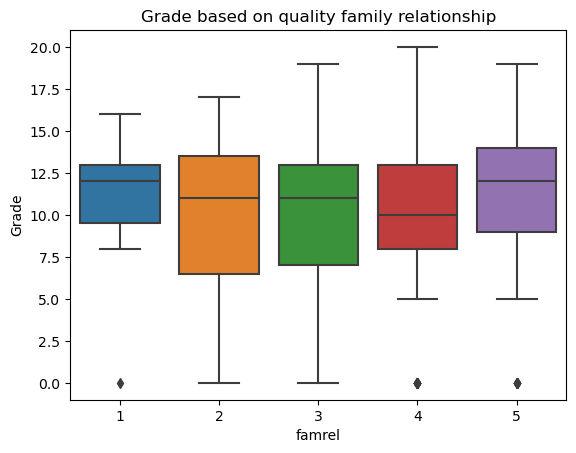

In [37]:
target_famr= sns.boxplot(x='famrel', y='Grade',data=df)
target_famr.axes.set_title('Grade based on quality family relationship')

Text(0.5, 1.0, 'Grade based on health')

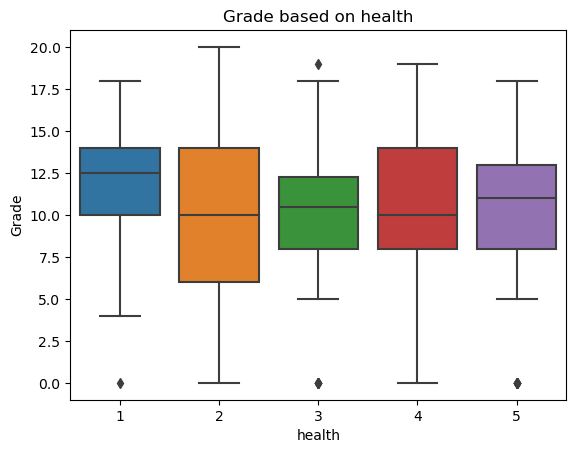

In [38]:
target_health= sns.boxplot(x='health', y='Grade',data=df)
target_health.axes.set_title('Grade based on health')

Text(0.5, 1.0, 'Grade based on absences')

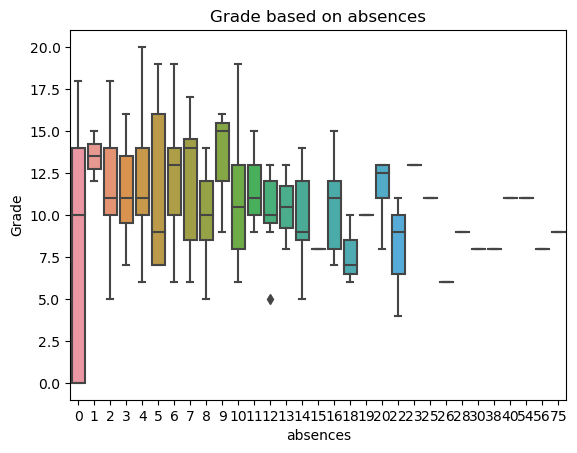

In [39]:
target_absc= sns.boxplot(x='absences', y='Grade',data=df)
target_absc.axes.set_title('Grade based on absences')

Text(0.5, 1.0, 'Grade based on workday alcohol consumption')

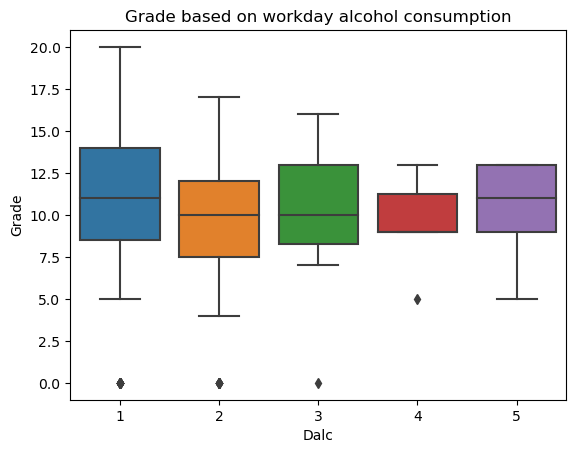

In [40]:
target_dalc= sns.boxplot(x='Dalc', y='Grade',data=df)
target_dalc.axes.set_title('Grade based on workday alcohol consumption')

Text(0.5, 1.0, 'Grade based on weekend alcohol consumption')

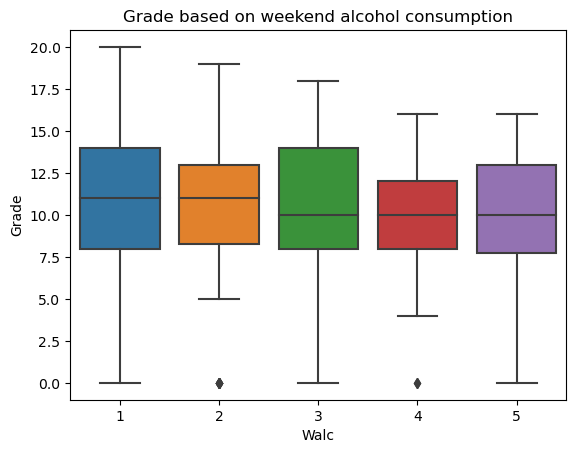

In [41]:
target_walc= sns.boxplot(x='Walc', y='Grade',data=df)
target_walc.axes.set_title('Grade based on weekend alcohol consumption')

Text(0.5, 1.0, 'Grade based on going out')

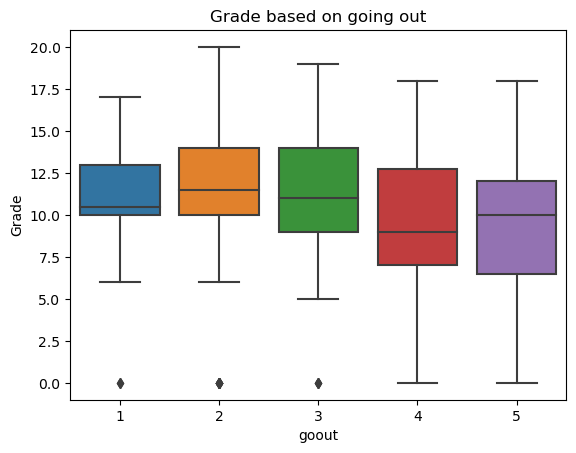

In [42]:
target_goout= sns.boxplot(x='goout', y='Grade',data=df)
target_goout.axes.set_title('Grade based on going out')

Text(0.5, 1.0, 'Grade based on freetime')

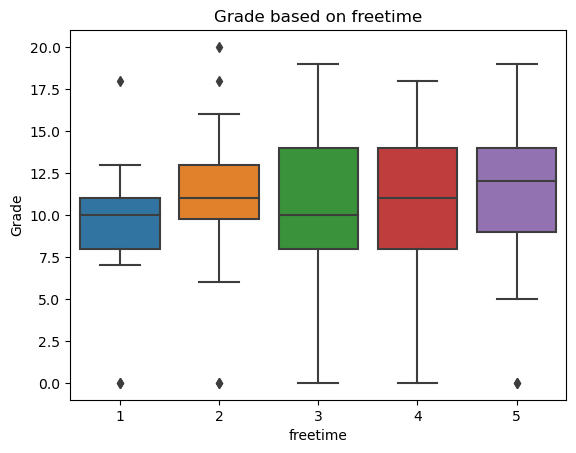

In [43]:
target_free= sns.boxplot(x='freetime', y='Grade',data=df)
target_free.axes.set_title('Grade based on freetime')

Text(0.5, 1.0, 'Grade based on father education')

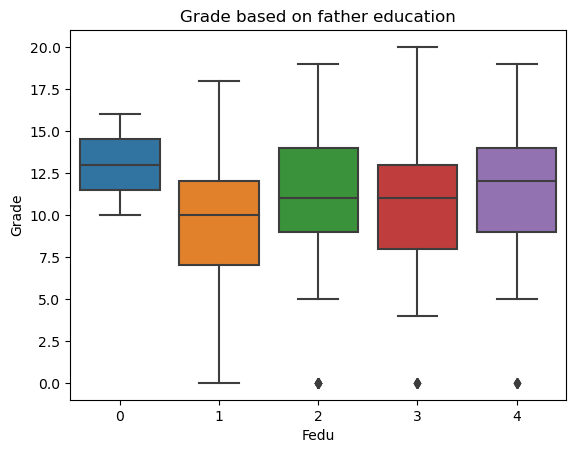

In [44]:
target_fath= sns.boxplot(x='Fedu', y='Grade',data=df)
target_fath.axes.set_title('Grade based on father education')

Text(0.5, 1.0, 'Grade based on mother education')

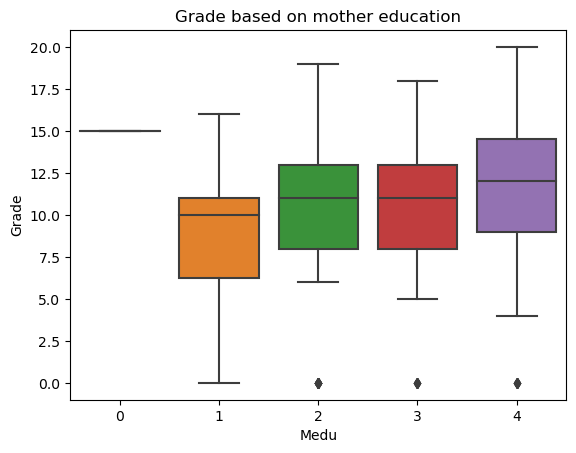

In [45]:
target_moth= sns.boxplot(x='Medu', y='Grade',data=df)
target_moth.axes.set_title('Grade based on mother education')

In [46]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [47]:
categorical_values

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,M,U,GT3,T,teacher,other,reputation,mother,no,no,no,no,yes,yes,yes,no
1,GP,M,U,GT3,T,health,health,other,father,no,yes,yes,no,yes,yes,yes,no
2,GP,M,U,LE3,T,teacher,other,course,mother,no,no,no,yes,yes,yes,yes,no
3,GP,M,U,LE3,T,other,other,reputation,mother,no,yes,no,yes,yes,yes,yes,no
4,GP,F,R,GT3,T,services,health,course,mother,yes,yes,yes,yes,yes,yes,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,MS,M,R,GT3,T,other,other,course,other,no,no,no,no,no,yes,no,no
273,MS,M,R,LE3,T,services,other,course,mother,no,no,no,no,no,yes,yes,no
274,MS,M,U,LE3,T,other,at_home,course,father,no,no,no,no,yes,yes,yes,no
275,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no


In [48]:
labelencoder = LabelEncoder()

In [49]:
df.corr()['Grade'].sort_values()

failures     -0.397915
age          -0.200944
goout        -0.172481
traveltime   -0.090327
Walc         -0.088524
Dalc         -0.077911
health       -0.042986
absences      0.012573
freetime      0.039856
famrel        0.079250
studytime     0.124262
Fedu          0.145828
Medu          0.198912
Grade         1.000000
Name: Grade, dtype: float64

In [50]:
highly_correlated = df.corr()['Grade'].sort_values(ascending=False)

highly_correlated = highly_correlated[:17]
highly_correlated

Grade         1.000000
Medu          0.198912
Fedu          0.145828
studytime     0.124262
famrel        0.079250
freetime      0.039856
absences      0.012573
health       -0.042986
Dalc         -0.077911
Walc         -0.088524
traveltime   -0.090327
goout        -0.172481
age          -0.200944
failures     -0.397915
Name: Grade, dtype: float64

In [51]:
categorical_values

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,M,U,GT3,T,teacher,other,reputation,mother,no,no,no,no,yes,yes,yes,no
1,GP,M,U,GT3,T,health,health,other,father,no,yes,yes,no,yes,yes,yes,no
2,GP,M,U,LE3,T,teacher,other,course,mother,no,no,no,yes,yes,yes,yes,no
3,GP,M,U,LE3,T,other,other,reputation,mother,no,yes,no,yes,yes,yes,yes,no
4,GP,F,R,GT3,T,services,health,course,mother,yes,yes,yes,yes,yes,yes,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,MS,M,R,GT3,T,other,other,course,other,no,no,no,no,no,yes,no,no
273,MS,M,R,LE3,T,services,other,course,mother,no,no,no,no,no,yes,yes,no
274,MS,M,U,LE3,T,other,at_home,course,father,no,no,no,no,yes,yes,yes,no
275,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no


In [52]:
categorical_values = categorical_values.drop(['school', 'sex', 'address', 'famsize','schoolsup', 'nursery', 'internet', 'romantic', 'Pstatus', 'paid', 'famsup', 'activities'], axis = 1)#############################
numerical_values = numerical_values.drop(['age', 'freetime', 'Dalc', 'Walc', 'health', 'absences', 'traveltime', 'studytime', 'famrel'], axis=1)

In [53]:
categorical_values.nunique()

Mjob        5
Fjob        5
reason      4
guardian    3
higher      2
dtype: int64

In [54]:
Categorical_oneHotEnc = pd.DataFrame([categorical_values.guardian]).T

In [55]:
Categorical_oneHotEnc

,guardian
0,mother
1,father
2,mother
3,mother
4,mother
...,...
272,other
273,mother
274,father
275,mother


In [56]:
categorical_values = categorical_values.drop(['Mjob', 'Fjob', 'reason','guardian'], axis=1)

In [57]:
for col in categorical_values:
    categorical_values[col] = labelencoder.fit_transform(categorical_values[col])

In [58]:
categorical_values


,higher
0,1
1,1
2,1
3,1
4,1
...,...
272,1
273,1
274,1
275,1


In [59]:
from sklearn.compose import ColumnTransformer,make_column_transformer

In [60]:
transformer = make_column_transformer((OneHotEncoder(sparse=False), ['guardian']),remainder='passthrough')

In [61]:
Categorical_oneHotEnc


,guardian
0,mother
1,father
2,mother
3,mother
4,mother
...,...
272,other
273,mother
274,father
275,mother


In [62]:
transformed_data = pd.DataFrame(transformer.fit_transform(Categorical_oneHotEnc), columns=transformer.get_feature_names_out())

In [63]:
transformed_data

,onehotencoder__guardian_father,onehotencoder__guardian_mother,onehotencoder__guardian_other
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
272,0.0,0.0,1.0
273,0.0,1.0,0.0
274,1.0,0.0,0.0
275,0.0,1.0,0.0


In [64]:
categorical_values = pd.concat([categorical_values, transformed_data], axis=1)

In [65]:
categorical_values

,higher,onehotencoder__guardian_father,onehotencoder__guardian_mother,onehotencoder__guardian_other
0,1,0.0,1.0,0.0
1,1,1.0,0.0,0.0
2,1,0.0,1.0,0.0
3,1,0.0,1.0,0.0
4,1,0.0,1.0,0.0
...,...,...,...,...
272,1,0.0,0.0,1.0
273,1,0.0,1.0,0.0
274,1,1.0,0.0,0.0
275,1,0.0,1.0,0.0


In [66]:
from sklearn.preprocessing import StandardScaler, Normalizer

In [67]:
scaler = StandardScaler()

In [68]:
numerical_values_scaled = pd.DataFrame(scaler.fit_transform(numerical_values), columns=[numerical_values.columns])

In [69]:
numerical_values_scaled

,Medu,Fedu,failures,goout,Grade
0,1.156430,0.474579,-0.490847,-1.868267,1.010907
1,1.156430,1.400344,-0.490847,-0.982120,1.010907
2,1.156430,-0.451185,-0.490847,-1.868267,1.225812
3,-0.700562,-0.451185,-0.490847,0.790174,0.366192
4,-0.700562,1.400344,-0.490847,-0.982120,-0.493428
...,...,...,...,...,...
272,-1.629057,-1.376949,3.393858,-0.095973,-0.708333
273,0.227934,-0.451185,-0.490847,-1.868267,-0.063618
274,-1.629057,-1.376949,-0.490847,-0.095973,-0.278523
275,1.156430,1.400344,-0.490847,0.790174,-0.923238


In [70]:
normalize = Normalizer()

In [71]:
numerical_values_normalized = pd.DataFrame(normalize.fit_transform(numerical_values))

In [72]:
numerical_values_normalized

,0,1,2,3,4
0,0.252478,0.189358,0.000000,0.063119,0.946792
1,0.247594,0.247594,0.000000,0.123797,0.928477
2,0.240337,0.120168,0.000000,0.060084,0.961347
3,0.154303,0.154303,0.000000,0.308607,0.925820
4,0.213201,0.426401,0.000000,0.213201,0.852803
...,...,...,...,...,...
272,0.120386,0.120386,0.361158,0.361158,0.842701
273,0.280976,0.187317,0.000000,0.093659,0.936586
274,0.104257,0.104257,0.000000,0.312772,0.938315
275,0.436436,0.436436,0.000000,0.436436,0.654654


In [73]:
final_data1 = pd.concat([numerical_values, categorical_values], axis=1) #######

In [74]:
final_data1

,Medu,Fedu,failures,goout,Grade,higher,onehotencoder__guardian_father,onehotencoder__guardian_mother,onehotencoder__guardian_other
0,4,3,0,1,15,1,0.0,1.0,0.0
1,4,4,0,2,15,1,1.0,0.0,0.0
2,4,2,0,1,16,1,0.0,1.0,0.0
3,2,2,0,4,12,1,0.0,1.0,0.0
4,2,4,0,2,8,1,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
272,1,1,3,3,7,1,0.0,0.0,1.0
273,3,2,0,1,10,1,0.0,1.0,0.0
274,1,1,0,3,9,1,1.0,0.0,0.0
275,4,4,0,4,6,1,0.0,1.0,0.0


In [75]:
final_data2 = pd.concat([numerical_values, categorical_values], axis=1)

In [76]:
final_data2

,Medu,Fedu,failures,goout,Grade,higher,onehotencoder__guardian_father,onehotencoder__guardian_mother,onehotencoder__guardian_other
0,4,3,0,1,15,1,0.0,1.0,0.0
1,4,4,0,2,15,1,1.0,0.0,0.0
2,4,2,0,1,16,1,0.0,1.0,0.0
3,2,2,0,4,12,1,0.0,1.0,0.0
4,2,4,0,2,8,1,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
272,1,1,3,3,7,1,0.0,0.0,1.0
273,3,2,0,1,10,1,0.0,1.0,0.0
274,1,1,0,3,9,1,1.0,0.0,0.0
275,4,4,0,4,6,1,0.0,1.0,0.0


In [77]:
target = final_data1['Grade']

In [78]:
final_data1 = final_data1.drop('Grade', axis=1)

In [79]:
#final_data2 = final_data2.drop('Grade', axis=1)

In [80]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

import scipy

In [81]:
final_data1

,Medu,Fedu,failures,goout,higher,onehotencoder__guardian_father,onehotencoder__guardian_mother,onehotencoder__guardian_other
0,4,3,0,1,1,0.0,1.0,0.0
1,4,4,0,2,1,1.0,0.0,0.0
2,4,2,0,1,1,0.0,1.0,0.0
3,2,2,0,4,1,0.0,1.0,0.0
4,2,4,0,2,1,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
272,1,1,3,3,1,0.0,0.0,1.0
273,3,2,0,1,1,0.0,1.0,0.0
274,1,1,0,3,1,1.0,0.0,0.0
275,4,4,0,4,1,0.0,1.0,0.0


In [82]:
final_data1.shape

(277, 8)

In [83]:
target

0      15
1      15
2      16
3      12
4       8
       ..
272     7
273    10
274     9
275     6
276     0
Name: Grade, Length: 277, dtype: int64

In [84]:
target.shape

(277,)

In [85]:
x_test = pd.read_csv('test.csv')
#x_test = x_test.drop(['health', 'traveltime', 'goout', 'freetime', 'famrel'],axis=1)

In [86]:
x_test

,StudentId,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,278,GP,F,18,U,GT3,A,4,4,at_home,...,yes,no,no,4,3,4,1,1,3,6
1,279,GP,F,17,U,GT3,T,1,1,at_home,...,yes,yes,no,5,3,3,1,1,3,4
2,280,GP,F,15,U,LE3,T,1,1,at_home,...,yes,yes,no,4,3,2,2,3,3,10
3,281,GP,F,15,U,GT3,T,4,2,health,...,yes,yes,yes,3,2,2,1,1,5,2
4,282,GP,F,16,U,GT3,T,3,3,other,...,yes,no,no,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,393,MS,F,18,R,GT3,T,1,1,other,...,yes,yes,no,4,3,2,1,2,4,2
116,394,MS,F,20,U,GT3,T,4,2,health,...,yes,yes,yes,5,4,3,1,1,3,4
117,395,MS,F,18,R,LE3,T,4,4,teacher,...,yes,yes,no,5,4,3,3,4,2,4
118,396,MS,F,18,U,GT3,T,3,3,other,...,yes,yes,yes,4,1,3,1,2,1,0


In [87]:
test = pd.DataFrame(x_test)
test = test.iloc[: , 1:]

In [88]:
test

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,MS,F,18,R,GT3,T,1,1,other,other,...,yes,yes,no,4,3,2,1,2,4,2
116,MS,F,20,U,GT3,T,4,2,health,other,...,yes,yes,yes,5,4,3,1,1,3,4
117,MS,F,18,R,LE3,T,4,4,teacher,services,...,yes,yes,no,5,4,3,3,4,2,4
118,MS,F,18,U,GT3,T,3,3,other,other,...,yes,yes,yes,4,1,3,1,2,1,0


In [89]:
categorical_values1 = []
numerical_values1 = []
for i,c in enumerate(test.dtypes):
    if c=='object':
        categorical_values1.append(test.iloc[:,i])
    else:
        numerical_values1.append(test.iloc[:,i])

In [90]:
categorical_values1 = pd.DataFrame(categorical_values1).T
categorical_values1

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,MS,F,R,GT3,T,other,other,home,mother,no,no,no,no,yes,yes,yes,no
116,MS,F,U,GT3,T,health,other,course,other,no,yes,yes,no,no,yes,yes,yes
117,MS,F,R,LE3,T,teacher,services,course,mother,no,no,yes,yes,yes,yes,yes,no
118,MS,F,U,GT3,T,other,other,home,mother,no,no,yes,no,yes,yes,yes,yes


In [91]:
numerical_values1 = pd.DataFrame(numerical_values1).T
numerical_values1

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
0,18,4,4,2,2,0,4,3,4,1,1,3,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4
2,15,1,1,1,2,3,4,3,2,2,3,3,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2
4,16,3,3,1,2,0,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,18,1,1,4,3,0,4,3,2,1,2,4,2
116,20,4,2,2,3,2,5,4,3,1,1,3,4
117,18,4,4,1,2,0,5,4,3,3,4,2,4
118,18,3,3,1,2,0,4,1,3,1,2,1,0


In [92]:
categorical_values1.nunique()

school        2
sex           2
address       2
famsize       2
Pstatus       2
Mjob          5
Fjob          5
reason        4
guardian      3
schoolsup     2
famsup        2
paid          2
activities    2
nursery       2
higher        2
internet      2
romantic      2
dtype: int64

In [93]:
Categorical_oneHotEnc1 = pd.DataFrame([categorical_values1.guardian]).T

In [94]:
categorical_values1 = categorical_values1.drop(['Mjob', 'Fjob', 'reason','guardian'], axis=1)

In [95]:
for col in categorical_values1:
    categorical_values1[col] = labelencoder.fit_transform(categorical_values1[col])

In [96]:
categorical_values1

,school,sex,address,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,0,0,1,0,0,1,0,0,0,1,1,0,0
1,0,0,1,0,1,0,1,0,0,0,1,1,0
2,0,0,1,1,1,1,0,1,0,1,1,1,0
3,0,0,1,0,1,0,1,1,1,1,1,1,1
4,0,0,1,0,1,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0,0,0,1,0,0,0,0,1,1,1,0
116,1,0,1,0,1,0,1,1,0,0,1,1,1
117,1,0,0,1,1,0,0,1,1,1,1,1,0
118,1,0,1,0,1,0,0,1,0,1,1,1,1


In [97]:
transformer1 = make_column_transformer((OneHotEncoder(sparse=False), ['guardian']),remainder='passthrough')

In [98]:
Categorical_oneHotEnc1

,guardian
0,mother
1,father
2,mother
3,mother
4,father
...,...
115,mother
116,other
117,mother
118,mother


In [99]:
transformed_data1 = pd.DataFrame(transformer.fit_transform(Categorical_oneHotEnc1), columns=transformer.get_feature_names_out())

In [100]:
transformed_data1

,onehotencoder__guardian_father,onehotencoder__guardian_mother,onehotencoder__guardian_other
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0
...,...,...,...
115,0.0,1.0,0.0
116,0.0,0.0,1.0
117,0.0,1.0,0.0
118,0.0,1.0,0.0


In [101]:
categorical_values1 = pd.concat([categorical_values1, transformed_data1], axis=1)
categorical_values1 = categorical_values1.drop(['school', 'sex', 'address', 'famsize','schoolsup', 'nursery', 'internet', 'romantic', 'Pstatus', 'paid', 'famsup', 'activities'], axis = 1) #############################
numerical_values1 = numerical_values1.drop(['age', 'freetime', 'Dalc', 'Walc', 'health', 'absences', 'traveltime', 'studytime', 'famrel',], axis=1)

In [102]:
categorical_values1

,higher,onehotencoder__guardian_father,onehotencoder__guardian_mother,onehotencoder__guardian_other
0,1,0.0,1.0,0.0
1,1,1.0,0.0,0.0
2,1,0.0,1.0,0.0
3,1,0.0,1.0,0.0
4,1,1.0,0.0,0.0
...,...,...,...,...
115,1,0.0,1.0,0.0
116,1,0.0,0.0,1.0
117,1,0.0,1.0,0.0
118,1,0.0,1.0,0.0


In [103]:
numerical_values_scaled1 = pd.DataFrame(scaler.fit_transform(numerical_values1), columns=[numerical_values1.columns])

In [104]:
numerical_values_scaled1

,Medu,Fedu,failures,goout
0,1.112844,1.265772,-0.356291,0.832716
1,-1.522839,-1.446597,-0.356291,-0.101171
2,-1.522839,-1.446597,4.224589,-1.035059
3,1.112844,-0.542474,-0.356291,-1.035059
4,0.234283,0.361649,-0.356291,-1.035059
...,...,...,...,...
115,-1.522839,-1.446597,-0.356291,-1.035059
116,1.112844,-0.542474,2.697629,-0.101171
117,1.112844,1.265772,-0.356291,-0.101171
118,0.234283,0.361649,-0.356291,-0.101171


In [105]:
numerical_values_normalized1 = pd.DataFrame(normalize.fit_transform(numerical_values1))

In [106]:
numerical_values_normalized1

,0,1,2,3
0,0.577350,0.577350,0.000000,0.577350
1,0.301511,0.301511,0.000000,0.904534
2,0.258199,0.258199,0.774597,0.516398
3,0.816497,0.408248,0.000000,0.408248
4,0.639602,0.639602,0.000000,0.426401
...,...,...,...,...
115,0.408248,0.408248,0.000000,0.816497
116,0.696311,0.348155,0.348155,0.522233
117,0.624695,0.624695,0.000000,0.468521
118,0.577350,0.577350,0.000000,0.577350


In [107]:
test_final_data1 = pd.concat([numerical_values1, categorical_values1], axis=1) ####################

In [108]:
test_final_data1

,Medu,Fedu,failures,goout,higher,onehotencoder__guardian_father,onehotencoder__guardian_mother,onehotencoder__guardian_other
0,4,4,0,4,1,0.0,1.0,0.0
1,1,1,0,3,1,1.0,0.0,0.0
2,1,1,3,2,1,0.0,1.0,0.0
3,4,2,0,2,1,0.0,1.0,0.0
4,3,3,0,2,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
115,1,1,0,2,1,0.0,1.0,0.0
116,4,2,2,3,1,0.0,0.0,1.0
117,4,4,0,3,1,0.0,1.0,0.0
118,3,3,0,3,1,0.0,1.0,0.0


In [109]:
test_final_data2 = pd.concat([numerical_values1, categorical_values1], axis=1)

In [110]:
test_final_data2

,Medu,Fedu,failures,goout,higher,onehotencoder__guardian_father,onehotencoder__guardian_mother,onehotencoder__guardian_other
0,4,4,0,4,1,0.0,1.0,0.0
1,1,1,0,3,1,1.0,0.0,0.0
2,1,1,3,2,1,0.0,1.0,0.0
3,4,2,0,2,1,0.0,1.0,0.0
4,3,3,0,2,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
115,1,1,0,2,1,0.0,1.0,0.0
116,4,2,2,3,1,0.0,0.0,1.0
117,4,4,0,3,1,0.0,1.0,0.0
118,3,3,0,3,1,0.0,1.0,0.0


In [111]:
x_train = final_data1

In [112]:
y_train = target

In [113]:
x_test = test_final_data2

In [114]:
model = LinearRegression()

In [115]:
model.fit(x_train, y_train)

LinearRegression()

In [116]:
y_pred = model.predict(x_test)

In [117]:
print(f"predicted response:\n{y_pred}")

predicted response:
[11.11178047 10.59123261  5.03243203 12.40878409 11.98310342 12.28034383
 10.23997121 11.11178047 11.84443921 12.10762026 11.63184202 11.67563905
 11.8989465  11.76028228 11.2898507  11.11178047 11.63184202 11.71599895
  4.47249687 12.02738675 11.88872253  9.17845133 11.11178047 10.67587584
 10.36841146 12.28034383 12.15190358 10.98285392 11.88872253 11.11178047
  9.5511095  10.46279236 11.24022072 11.50732519 11.76028228 11.63184202
 11.4528179  10.76003277 12.23998393 12.23998393 10.19568789 10.50707568
 11.29031829 11.11178047 10.23997121 10.2944785  11.5875587   2.68324432
  6.88552766 10.59171891  7.98015806 10.32412814 10.50707568 12.37472473
 11.06749714 11.63184202 10.02737403  7.85125022  7.86681403 12.15190358
 10.67587584 10.19568789 10.88847302 11.1959374  10.19568789 10.63159252
 10.32412814  9.68538271 11.71599895 10.89869699 11.29031829 11.63184202
 10.94298031  9.17452791 12.15190358 10.72015916 10.63159252  9.80406658
 11.28009433  9.71990965 11.205

In [118]:
res = pd.DataFrame(y_pred)
res.index = x_test.index # its important for comparison
res.columns = ['Grade']
res.to_csv("prediction5.csv")